[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-regression-baseline-01.ipynb)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

***> 회귀로 Insulin의 값을 예측한다.***

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [4]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
(df["Insulin"] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [5]:
# train 세트를 만듭니다.

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [6]:
# test 세트를 만듭니다.

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

## EDA

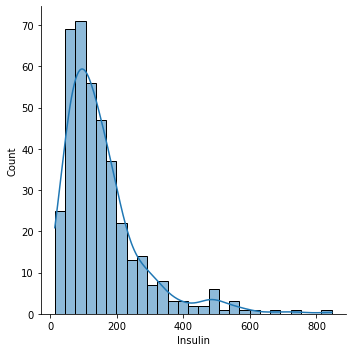

In [7]:
# sns.distplot(train["Insulin"])
sns.displot(data=train, x="Insulin", kde=True)

<AxesSubplot:xlabel='Insulin'>

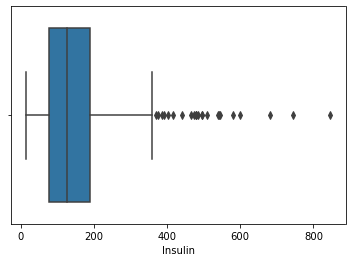

In [8]:
sns.boxplot(data=train, x="Insulin")

In [9]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [10]:
# IQR =  3IQR - 1IQR
# OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [11]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [12]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)


## 학습, 예측에 사용할 컬럼

In [13]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [14]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Insulin"
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [15]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(370, 8)

In [16]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(370,)

In [17]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [18]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
              RandomForestRegressor(random_state=42),
              GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [76]:
# RandomSearchCV로 최적의 파라메터 값 찾기
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []
    
    max_depth = np.random.randint(5, 30, 100)
    max_features = np.random.uniform(0.3, 1.0, 100)

    param_distributions = {"max_depth": max_depth, "max_features": max_features}

    regressor = RandomizedSearchCV(estimator,
                       param_distributions,
                       n_iter=100,
                       scoring=None,
                       n_jobs=None,
                       cv=None,
                       verbose=2,
                       random_state=42)
    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........max_depth=6, max_features=0.58214373399408; total time=   0.0s
[CV] END .........max_depth=6, max_features=0.58214373399408; total time=   0.0s
[CV] END .........max_depth=6, max_features=0.58214373399408; total time=   0.0s
[CV] END .........max_depth=6, max_features=0.58214373399408; total time=   0.0s
[CV] END .........max_depth=6, max_features=0.58214373399408; total time=   0.0s
[CV] END .....max_depth=20, max_features=0.45172225205080085; total time=   0.0s
[CV] END .....max_depth=20, max_features=0.45172225205080085; total time=   0.0s
[CV] END .....max_depth=20, max_features=0.45172225205080085; total time=   0.0s
[CV] END .....max_depth=20, max_features=0.45172225205080085; total time=   0.0s
[CV] END .....max_depth=20, max_features=0.45172225205080085; total time=   0.0s
[CV] END ......max_depth=29, max_features=0.6567664766317408; total time=   0.0s
[CV] END ......max_depth=29, max_features=0.65

[CV] END ......max_depth=18, max_features=0.9833092882613368; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.9833092882613368; total time=   0.0s
[CV] END ......max_depth=15, max_features=0.5414723096593168; total time=   0.0s
[CV] END ......max_depth=15, max_features=0.5414723096593168; total time=   0.0s
[CV] END ......max_depth=15, max_features=0.5414723096593168; total time=   0.0s
[CV] END ......max_depth=15, max_features=0.5414723096593168; total time=   0.0s
[CV] END ......max_depth=15, max_features=0.5414723096593168; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.4378163078817625; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.4378163078817625; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.4378163078817625; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.4378163078817625; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.4378163078817625; total time=   0.0s
[CV] END ......max_depth=28,

[CV] END ......max_depth=18, max_features=0.8452639109026048; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.8172486889300106; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.8172486889300106; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.8172486889300106; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.8172486889300106; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.8172486889300106; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.8631873579457197; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.8631873579457197; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.8631873579457197; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.8631873579457197; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.8631873579457197; total time=   0.0s
[CV] END ......max_depth=22, max_features=0.9157112523714399; total time=   0.0s
[CV] END ......max_depth=22,

[CV] END ......max_depth=22, max_features=0.9648873393496802; total time=   0.0s
[CV] END ......max_depth=25, max_features=0.7357112023992805; total time=   0.0s
[CV] END ......max_depth=25, max_features=0.7357112023992805; total time=   0.0s
[CV] END ......max_depth=25, max_features=0.7357112023992805; total time=   0.0s
[CV] END ......max_depth=25, max_features=0.7357112023992805; total time=   0.0s
[CV] END ......max_depth=25, max_features=0.7357112023992805; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.9936210282883902; total time=   0.0s
[CV] END .......max_depth=24, max_features=0.576602872609329; total time=   0.0s
[CV] END .......max_depth=24

[CV] END .....max_depth=19, max_features=0.41063129761588074; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.41063129761588074; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9936210282883902; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.7218765657370241; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.7218765657370241; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.7218765657370241; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.7218765657370241; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.7218765657370241; total time=   0.0s
[CV] END ......max_depth=29,

[CV] END .....max_depth=15, max_features=0.30244652986883097; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5212215720724174; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5212215720724174; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5212215720724174; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5212215720724174; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5212215720724174; total time=   0.1s
[CV] END .....max_depth=22, max_features=0.34726832464449764; total time=   0.1s
[CV] END .....max_depth=22, max_features=0.34726832464449764; total time=   0.1s
[CV] END .....max_depth=22, max_features=0.34726832464449764; total time=   0.1s
[CV] END .....max_depth=22, max_features=0.34726832464449764; total time=   0.1s
[CV] END .....max_depth=22, max_features=0.34726832464449764; total time=   0.1s
[CV] END .......max_depth=5, max_features=0.7186900393019922; total time=   0.0s
[CV] END .......max_depth=5,

[CV] END ......max_depth=18, max_features=0.6470282920354684; total time=   0.2s
[CV] END ......max_depth=18, max_features=0.6470282920354684; total time=   0.2s
[CV] END ......max_depth=18, max_features=0.6470282920354684; total time=   0.2s
[CV] END ......max_depth=18, max_features=0.6470282920354684; total time=   0.1s
[CV] END ......max_depth=25, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=25, max_features=0.5094988406131398; total time=   0.2s
[CV] END ......max_depth=25, max_features=0.5094988406131398; total time=   0.3s
[CV] END ......max_depth=25, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=25, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=25, max_features=0.5135328530727892; total time=   0.1s
[CV] END ......max_depth=25, max_features=0.5135328530727892; total time=   0.1s
[CV] END ......max_depth=25, max_features=0.5135328530727892; total time=   0.1s
[CV] END ......max_depth=25,

[CV] END ......max_depth=12, max_features=0.7726096637012774; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.7726096637012774; total time=   0.1s
[CV] END ......max_depth=15, max_features=0.9531132436387701; total time=   0.2s
[CV] END ......max_depth=15, max_features=0.9531132436387701; total time=   0.1s
[CV] END ......max_depth=15, max_features=0.9531132436387701; total time=   0.1s
[CV] END ......max_depth=15, max_features=0.9531132436387701; total time=   0.1s
[CV] END ......max_depth=15, max_features=0.9531132436387701; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.7623645656264284; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.7623645656264284; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.7623645656264284; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.7623645656264284; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.7623645656264284; total time=   0.1s
[CV] END .....max_depth=25, 

[CV] END ......max_depth=28, max_features=0.3516049682069578; total time=   0.1s
[CV] END ......max_depth=28, max_features=0.3516049682069578; total time=   0.1s
[CV] END ......max_depth=28, max_features=0.3516049682069578; total time=   0.1s
[CV] END ......max_depth=28, max_features=0.3516049682069578; total time=   0.1s
[CV] END ......max_depth=28, max_features=0.9287232127988809; total time=   0.2s
[CV] END ......max_depth=28, max_features=0.9287232127988809; total time=   0.1s
[CV] END ......max_depth=28, max_features=0.9287232127988809; total time=   0.2s
[CV] END ......max_depth=28, max_features=0.9287232127988809; total time=   0.2s
[CV] END ......max_depth=28, max_features=0.9287232127988809; total time=   0.2s
[CV] END ......max_depth=23, max_features=0.6285660252029075; total time=   0.2s
[CV] END ......max_depth=23, max_features=0.6285660252029075; total time=   0.2s
[CV] END ......max_depth=23, max_features=0.6285660252029075; total time=   0.3s
[CV] END ......max_depth=23,

[CV] END .....max_depth=12, max_features=0.44833449680002846; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=12, max_features=0.5094988406131398; total time=   0.1s
[CV] END ......max_depth=6, max_features=0.33144004633090657; total time=   0.0s
[CV] END ......max_depth=6, max_features=0.33144004633090657; total time=   0.0s
[CV] END ......max_depth=6, max_features=0.33144004633090657; total time=   0.1s
[CV] END ......max_depth=6, max_features=0.33144004633090657; total time=   0.0s
[CV] END ......max_depth=6, max_features=0.33144004633090657; total time=   0.1s
[CV] END ......max_depth=23, max_features=0.7101150801695069; total time=   0.1s
[CV] END ......max_depth=23,

[CV] END ......max_depth=20, max_features=0.8032501667732761; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.8032501667732761; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.8032501667732761; total time=   0.1s
[CV] END ......max_depth=20, max_features=0.8032501667732761; total time=   0.1s
[CV] END ......max_depth=24, max_features=0.6051479674997513; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6051479674997513; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6051479674997513; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6051479674997513; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6051479674997513; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6007783138618854; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6007783138618854; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.6007783138618854; total time=   0.0s
[CV] END ......max_depth=24,

[CV] END ......max_depth=10, max_features=0.8440871478238352; total time=   0.0s
[CV] END ......max_depth=10, max_features=0.8440871478238352; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.7174123670714093; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.7174123670714093; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.7174123670714093; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.7174123670714093; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.7174123670714093; total time=   0.1s
[CV] END ......max_depth=26, max_features=0.8491053962871127; total time=   0.1s
[CV] END ......max_depth=26, max_features=0.8491053962871127; total time=   0.1s
[CV] END ......max_depth=26, max_features=0.8491053962871127; total time=   0.2s
[CV] END ......max_depth=26, max_features=0.8491053962871127; total time=   0.2s
[CV] END ......max_depth=26, max_features=0.8491053962871127; total time=   0.2s
[CV] END ......max_depth=29,

[CV] END ......max_depth=29, max_features=0.9496937676284187; total time=   0.1s
[CV] END ......max_depth=29, max_features=0.9496937676284187; total time=   0.1s
[CV] END ......max_depth=29, max_features=0.9496937676284187; total time=   0.1s
[CV] END ......max_depth=29, max_features=0.9496937676284187; total time=   0.1s
[CV] END ......max_depth=29, max_features=0.9496937676284187; total time=   0.1s
[CV] END ......max_depth=21, max_features=0.8706550442595864; total time=   0.1s
[CV] END ......max_depth=21, max_features=0.8706550442595864; total time=   0.1s
[CV] END ......max_depth=21, max_features=0.8706550442595864; total time=   0.1s
[CV] END ......max_depth=21, max_features=0.8706550442595864; total time=   0.1s
[CV] END ......max_depth=21, max_features=0.8706550442595864; total time=   0.1s
[CV] END ......max_depth=24, max_features=0.8265161603768192; total time=   0.1s
[CV] END ......max_depth=24, max_features=0.8265161603768192; total time=   0.1s
[CV] END ......max_depth=24,

[CV] END ......max_depth=24, max_features=0.9181881852681781; total time=   0.1s
[CV] END ......max_depth=24, max_features=0.9181881852681781; total time=   0.1s
[CV] END ......max_depth=24, max_features=0.9181881852681781; total time=   0.1s
[CV] END ......max_depth=14, max_features=0.9205527025597684; total time=   0.1s
[CV] END ......max_depth=14, max_features=0.9205527025597684; total time=   0.1s
[CV] END ......max_depth=14, max_features=0.9205527025597684; total time=   0.1s
[CV] END ......max_depth=14, max_features=0.9205527025597684; total time=   0.1s
[CV] END ......max_depth=14, max_features=0.9205527025597684; total time=   0.1s
[CV] END ......max_depth=19, max_features=0.4773705832452051; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.4773705832452051; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.4773705832452051; total time=   0.0s
[CV] END ......max_depth=19, max_features=0.4773705832452051; total time=   0.0s
[CV] END ......max_depth=19,

[CV] END ......max_depth=22, max_features=0.8621895960865829; total time=   0.2s
[CV] END ......max_depth=19, max_features=0.7780211689309017; total time=   0.1s
[CV] END ......max_depth=19, max_features=0.7780211689309017; total time=   0.1s
[CV] END ......max_depth=19, max_features=0.7780211689309017; total time=   0.1s
[CV] END ......max_depth=19, max_features=0.7780211689309017; total time=   0.1s
[CV] END ......max_depth=19, max_features=0.7780211689309017; total time=   0.1s
[CV] END .......max_depth=9, max_features=0.3225008710456136; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.3225008710456136; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.3225008710456136; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.3225008710456136; total time=   0.0s
[CV] END .......max_depth=9, max_features=0.3225008710456136; total time=   0.0s
[CV] END .......max_depth=6, max_features=0.3345620052367965; total time=   0.0s
[CV] END .......max_depth=6,

In [77]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.7251461493660908, 'max_dept...","DecisionTreeRegressor(max_depth=5, max_feature...",0.160619,"{'mean_fit_time': [0.004491281509399414, 0.005..."
1,RandomForestRegressor,"{'max_features': 0.7726096637012774, 'max_dept...","(DecisionTreeRegressor(max_depth=6, max_featur...",0.343569,"{'mean_fit_time': [0.16498117446899413, 0.1862..."
2,GradientBoostingRegressor,"{'max_features': 0.34881866875777545, 'max_dep...",([DecisionTreeRegressor(criterion='friedman_ms...,0.300257,"{'mean_fit_time': [0.0758094310760498, 0.13037..."


In [78]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(max_depth=6, max_features=0.7726096637012774,
                      random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [79]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=0.7726096637012774,
                      random_state=42)

## cross validation 으로 학습 세트의 오차 측정하기

In [80]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


array([ 53.28511026, 155.34459144,  83.87204126, 142.4014788 ,
       175.58710204])

<AxesSubplot:xlabel='Insulin'>

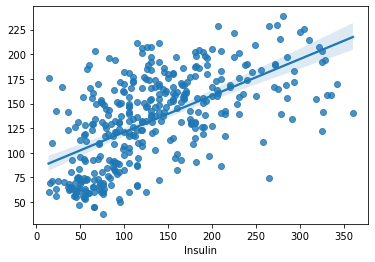

In [81]:
# regplot 으로 결과 값을 비교합니다.

sns.regplot(x=y_train, y=y_predict)

* 이전에 DecisionTree 하나만 쓸 때에 비해 회귀선에 값들이 가깝다.

In [82]:
# r2_score 를 구합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.3544986531572055

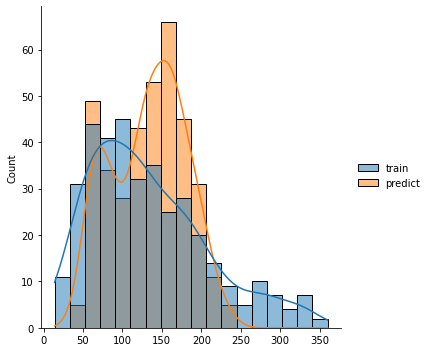

In [83]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

# sns.distplot(y_train, hist=False, label="train")
# sns.distplot(y_predict, hist=False, label="predict")

sns.displot(data=pd.DataFrame({"train": y_train, "predict": y_predict}),  kde=True)

## 오차 구하기

In [84]:
# MAE
# 86.57
# 77.55 (Insulin<600)
# 62.05 (Insulin<IQR*1.5)
# 44.547 (RandomSearchCV, n_iter=10)
error = abs(y_train - y_predict)
error.mean()

44.09817494335227

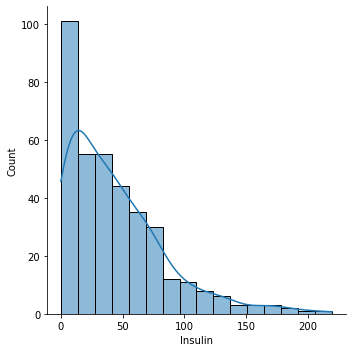

In [85]:
# sns.distplot(error)
sns.displot(error, kde=True)

In [86]:
error.describe()

count    370.000000
mean      44.098175
std       40.151758
min        0.018463
25%       13.044815
50%       35.981437
75%       63.441426
max      219.689817
Name: Insulin, dtype: float64

In [87]:
# RMSE
# 126.895
# 114.077 (Insulin<600)
# 84 (Insulin<IQR*1.5)
# 59.69(RandomSearchCV, n_iter=10)
np.sqrt(((y_train - y_predict) ** 2).mean())

59.602479193142806

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* 피처의 중요도를 구합니다.

In [88]:
# 피처의 중요도를 추출하기
best_estimator.feature_importances_

array([0.03144443, 0.51052127, 0.05385668, 0.07701449, 0.11564813,
       0.0761879 , 0.09719081, 0.03813629])

<AxesSubplot:>

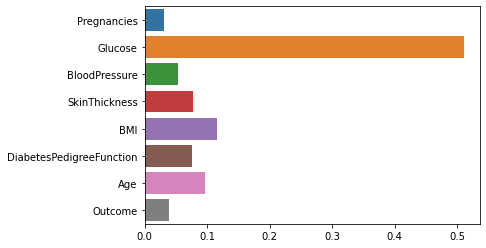

In [89]:
# 피처의 중요도 시각화 하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

* Glucose 수치가 가장 큰 영향을 미친다.

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [90]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([188.98058923,  59.82579173, 191.63171165, 146.05737444,
       163.40918945])

In [91]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [92]:
test["Insulin"] = y_test

In [93]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,128.289330,44.313426,51.484853,87.893577,133.500489,165.116390,215.533431
1,138.0,171.668805,30.651917,82.644707,154.593799,172.981233,191.383671,252.251978


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

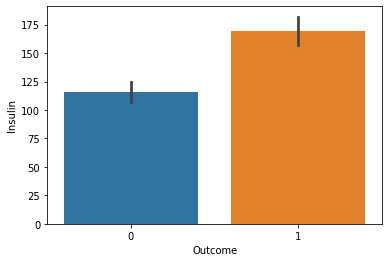

In [94]:
# Insulin 평균값을 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

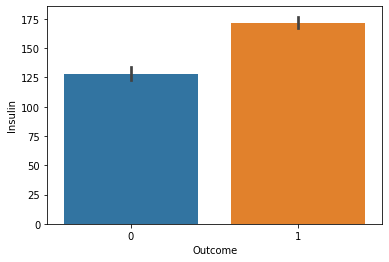

In [95]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

## 예측값을 CSV 파일로 저장하기

In [96]:
df.loc[df["Insulin"] == 0, "Insulin"]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [97]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [101]:
df.to_csv("data/diabetes_fill_insulin.csv", index=False)

In [102]:
pd.read_csv("data/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,188.980589,33.6,0.627,50,1
1,1,85,66,29,59.825792,26.6,0.351,31,0
2,8,183,64,0,191.631712,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,162.954872,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,165.036096,30.1,0.349,47,1
